In [7]:
!pip install ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 5.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


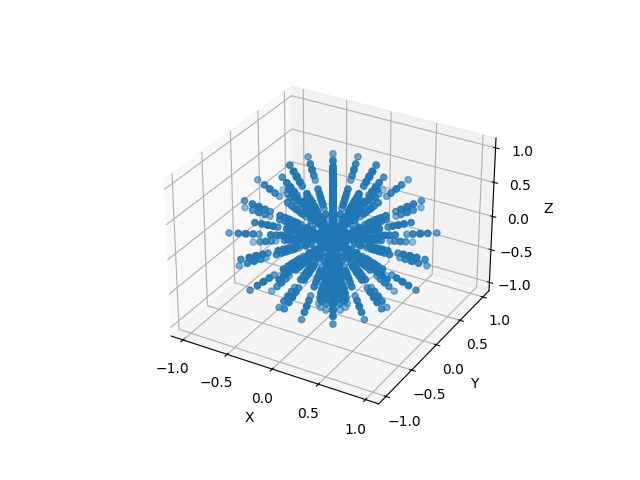

In [19]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def generate_equidistant_points_on_circle(num_points):
    """
    Generate equidistant points on a circle.
    """
    angles = np.linspace(0, 2 * np.pi, num_points, endpoint=False)
    points = np.stack((np.cos(angles), np.sin(angles)), axis=-1)
    return points

def generate_epsilon_net_sphere(d, epsilon):
    """
    Generate approximately equidistant points on a d-dimensional sphere.
    """
    if d == 2:
        return generate_equidistant_points_on_circle(int(2 * np.pi / epsilon))
    else:
        points = []
        lower_dim_points = generate_epsilon_net_sphere(d-1, epsilon)
        phi = np.arange(0, np.pi, epsilon)
        for p in phi:
            sin_p = np.sin(p)
            cos_p = np.cos(p)
            for point in lower_dim_points:
                new_point = np.zeros(d)
                new_point[:-1] = point * sin_p
                new_point[-1] = cos_p
                points.append(new_point)
        return np.array(points)

def embed_points(points, D):
    """
    Embed d-dimensional points into D-dimensional space.
    """
    embedded_points = np.zeros((points.shape[0], D))
    embedded_points[:, :points.shape[1]] = points
    return embedded_points

def plot_points_3D(points):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

def plot_points_generic(points, d, D):
    if D >= 3:
        plot_points_3D(points[:, :3])
    else:
        print(f"Plotting is not implemented for d={d} and D={D}")

# Parameters
d = 5
D = 5
epsilon = 0.5  # Angular resolution

# Generate and plot the epsilon-net points
points_on_sphere = generate_epsilon_net_sphere(d, epsilon)
points_in_D_space = embed_points(points_on_sphere, D)
plot_points_generic(points_in_D_space, d, D)





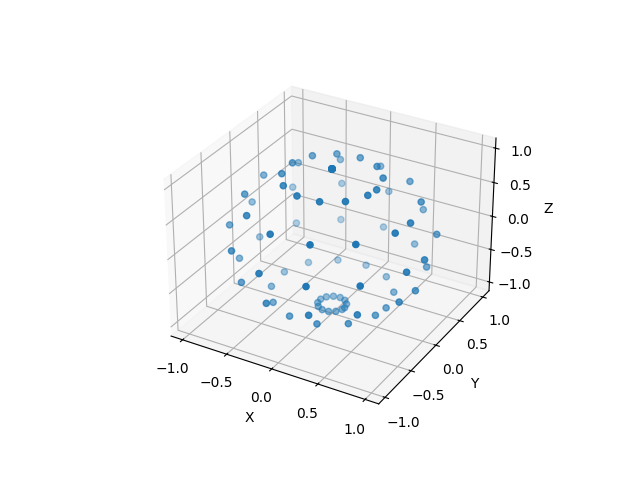

In [2]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def spherical_to_cartesian(r, angles):
    """
    Convert spherical coordinates to Cartesian coordinates in d dimensions.
    """
    coords = []
    coords.append(r * np.cos(angles[0]))
    for i in range(1, len(angles)):
        coord = r
        for j in range(i):
            coord *= np.sin(angles[j])
        coord *= np.cos(angles[i])
        coords.append(coord)
    coord = r
    for angle in angles:
        coord *= np.sin(angle)
    coords.append(coord)
    return coords

def generate_epsilon_net_sphere(d, epsilon):
    """
    Generate an epsilon net on a d-dimensional unit sphere.
    """
    if d == 2:
        theta = np.arange(0, 2 * np.pi, epsilon)
        return np.array([np.cos(theta), np.sin(theta)]).T
    elif d == 3:
        phi = np.arange(0, 2 * np.pi, epsilon)
        theta = np.arange(0, np.pi, epsilon)
        points = []
        for t in theta:
            for p in phi:
                x = np.sin(t) * np.cos(p)
                y = np.sin(t) * np.sin(p)
                z = np.cos(t)
                points.append([x, y, z])
        return np.array(points)
    else:
        points = []
        phi = np.arange(0, 2 * np.pi, epsilon)
        for p in phi:
            lower_dim_points = generate_epsilon_net_sphere(d-1, epsilon)
            for point in lower_dim_points:
                new_point = np.zeros(d)
                new_point[:-1] = np.array(point) * np.sin(p)
                new_point[-1] = np.cos(p)
                points.append(new_point)
        return np.array(points)

def embed_points(points, D):
    """
    Embed d-dimensional points into D-dimensional space.
    """
    embedded_points = np.zeros((points.shape[0], D))
    embedded_points[:, :points.shape[1]] = points
    return embedded_points

def plot_points_3D(points):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

def plot_points_generic(points, d, D):
    if D >= 3:
        plot_points_3D(points[:, :3])
    else:
        print(f"Plotting is not implemented for d={d} and D={D}")

# Parameters
d = 3
D = 100
epsilon = 0.5  # Angular resolution

# Generate and plot the epsilon-net points
points_on_sphere = generate_epsilon_net_sphere(d, epsilon)
points_in_D_space = embed_points(points_on_sphere, D)
plot_points_generic(points_in_D_space, d, D)


In [20]:
np.linalg.norm(points_in_D_space, axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

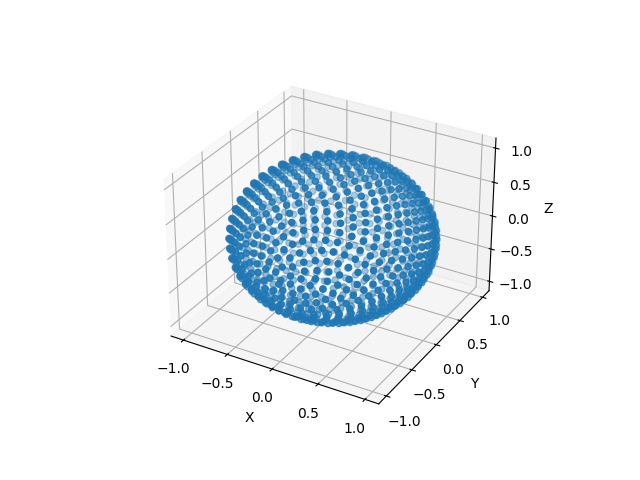

In [10]:
%matplotlib widget
from scipy.spatial import ConvexHull

def fibonacci_sphere(samples=1000):
    """
    Generate points on a 3D sphere using the Fibonacci lattice.
    """
    points = []
    phi = np.pi * (3. - np.sqrt(5.))  # golden angle in radians

    for i in range(samples):
        y = 1 - (i / float(samples - 1)) * 2  # y goes from 1 to -1
        radius = np.sqrt(1 - y * y)  # radius at y

        theta = phi * i  # golden angle increment

        x = np.cos(theta) * radius
        z = np.sin(theta) * radius

        points.append([x, y, z])

    return np.array(points)

def embed_points(points, D):
    """
    Embed 3D points into D-dimensional space.
    """
    embedded_points = np.zeros((points.shape[0], D))
    embedded_points[:, :3] = points
    return embedded_points

# Parameters
d = 3
D = 3
samples = 1000  # Number of points to generate

# Generate and plot the epsilon-net points
points_on_sphere = fibonacci_sphere(samples)
points_in_D_space = embed_points(points_on_sphere, D)
plot_points_3D(points_in_D_space)


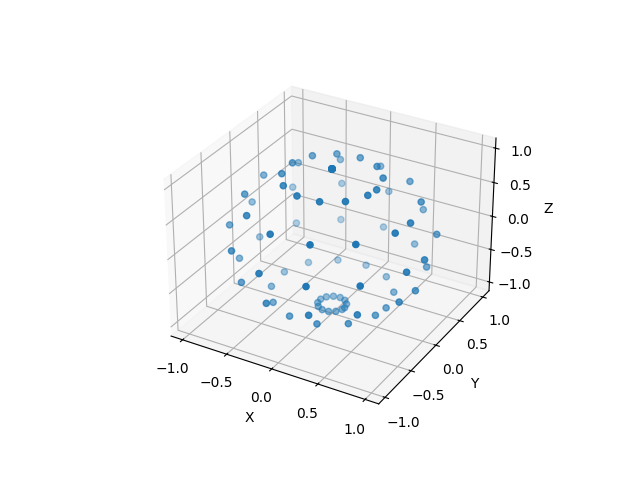

In [9]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def spherical_to_cartesian_recursive(r, angles):
    coords = []
    coords.append(r * np.cos(angles[0]))
    for i in range(1, len(angles)):
        coord = r
        for j in range(i):
            coord *= np.sin(angles[j])
        coord *= np.cos(angles[i])
        coords.append(coord)
    coord = r
    for angle in angles:
        coord *= np.sin(angle)
    coords.append(coord)
    return coords

def generate_epsilon_net_recursive(dim, epsilon):
    if dim == 2:
        theta = np.arange(0, 2 * np.pi, epsilon)
        return np.array([np.cos(theta), np.sin(theta)]).T
    else:
        lower_dim_points = generate_epsilon_net_recursive(dim - 1, epsilon)
        points = []
        phi = np.arange(0, np.pi, epsilon)
        for p in phi:
            for point in lower_dim_points:
                point = np.append(point * np.sin(p), np.cos(p))
                points.append(point)
        return np.array(points)

def embed_points(points, D):
    embedded_points = np.zeros((points.shape[0], D))
    embedded_points[:, :points.shape[1]] = points
    return embedded_points

def plot_points_3D(points):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

def plot_points_generic(points, d, D):
    if d == 2 and D == 3:
        plot_points_3D(points)
    elif d == 3 and D == 3:
        plot_points_3D(points)
    else:
        print(f"Plotting is not implemented for d={d} and D={D}")

# Parameters
d = 3
D = 3
epsilon = 0.5  # Angular resolution

# Generate and plot the epsilon-net points
points_on_sphere = generate_epsilon_net_recursive(d, epsilon)
points_in_D_space = embed_points(points_on_sphere, D)
plot_points_generic(points_in_D_space, d, D)


/var/folders/tw/j68gkt955z57h83crjdjjrg80000gr/T/ipykernel_1621/2698236153.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax.scatter(inputs_[:, 0], inputs_[:, 1], c=labels, cmap=matplotlib.cm.get_cmap('RdYlBu_r'))


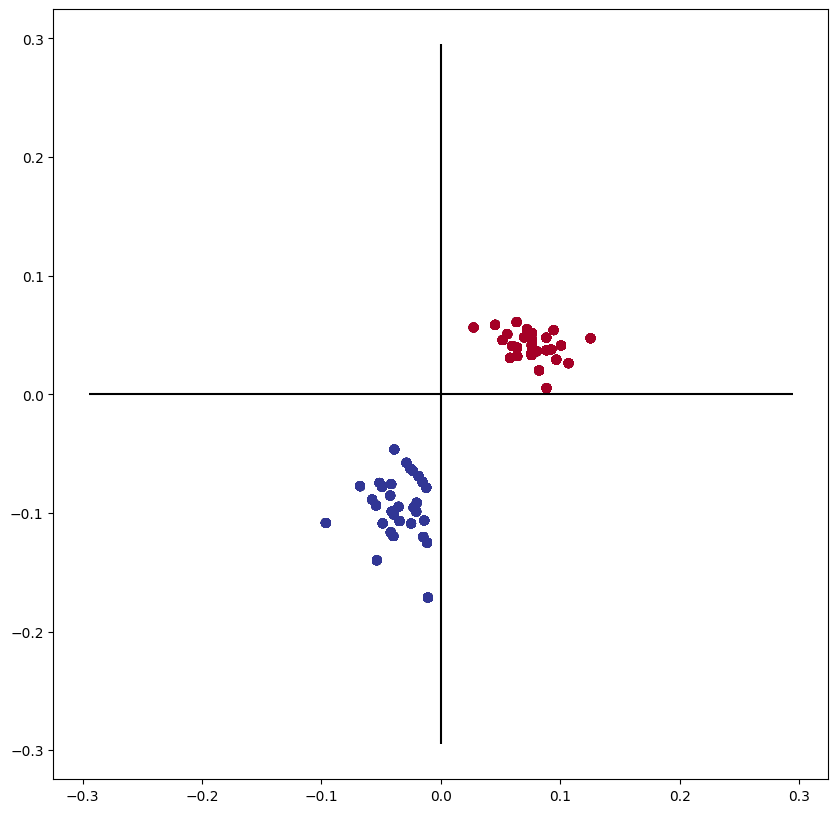

In [1]:
import os, sys, numpy, torch, matplotlib.pyplot, matplotlib.cm, ipycanvas

sys.path += [os.path.abspath(os.path.join('..')), os.path.abspath(os.path.join('../..'))]  # Allow repository modules to be imported

from settings.separable_sparse_coding import get_dataloader
from utils.optimization import initialize

experiment = {
    'dataset': 'separable_sparse_coding',
    'seed': 1,
    'input_dimension': 200, 
    'dictionary_items': 10, 
    'sample_size': 5000,  
    'batch_size': 5000, 
    'epochs': 1000,
    'learning_rate': 0.1,
    'initial_hidden_units': 100,
    'bias': False,
    'initialization_variance': 1e-5,
    'balanced_initialization': True,
    'name_parameters': ['epoch']
}
rotation_matrix = numpy.identity(experiment['input_dimension'])
device, generator = initialize(experiment['seed'])
train_data = get_dataloader(rotation_matrix=rotation_matrix, **experiment)
test_data = get_dataloader(rotation_matrix=rotation_matrix, **experiment)

fig, ax = matplotlib.pyplot.subplots(figsize=(10, 10))
inputs = []; labels = []
for batch_inputs, batch_labels in train_data: inputs.append(batch_inputs); labels.append(batch_labels)
inputs, labels = torch.concatenate(inputs), torch.concatenate(labels)
inputs_ = numpy.matmul(inputs.detach().cpu().numpy(), rotation_matrix.transpose())
ax.hlines(0, -inputs_.max() * 1.1, inputs_.max() * 1.1, color='k')
ax.vlines(0, -inputs_.max() * 1.1, inputs_.max() * 1.1, color='k')
ax.scatter(inputs_[:, 0], inputs_[:, 1], c=labels, cmap=matplotlib.cm.get_cmap('RdYlBu_r'))

In [2]:
matplotlib.pyplot.ioff()
figure, ((input_domain_ax, loss_ax), (parameters_norms_ax, gradients_norms_ax)) = matplotlib.pyplot.subplots(2, 2, figsize=(16, 16))
canvas = ipycanvas.Canvas()
canvas.width, canvas.height = 1200, 1200
canvas.font = "30px arial"
canvas.fill_text('Results will appear as processed', canvas.width / 4, canvas.height / 3)
canvas

Canvas(height=1200, width=1200)

In [3]:
from functools import partial
from plots import plot_train_loss, plot_samples_and_neurons, plot_weights_gradient_norms, plot_weights_norms, draw_figure_into_canvas, save_figure
from utils.models import FullyConnectedNeuralNetwork
from experiment import execute_experiment

plot_samples_and_neurons = partial(plot_samples_and_neurons, ax=input_domain_ax, rotation_matrix=rotation_matrix, dataloader=train_data)
plot_train_loss = partial(plot_train_loss, ax=loss_ax)
plot_weights_norms = partial(plot_weights_norms, ax=parameters_norms_ax)
plot_weights_gradient_norms = partial(plot_weights_gradient_norms, ax=gradients_norms_ax)
draw_figure_into_canvas = partial(draw_figure_into_canvas, figure=figure, canvas=canvas)
save_figure = partial(save_figure, figure=figure, parameters=experiment, **experiment)

def model_summary(model, model_metrics, epoch, *args, **kwargs):
    for layer_index, layer in enumerate(model.layers):
        layer_metrics = {'epoch': epoch, 'layer': layer_index, 'hidden_units': layer.weight.shape[0],
                         'neurons_weights_norm': layer.weight.norm(dim=1).detach().cpu().tolist()}
        if experiment['bias']: layer_metrics.update({'biases': layer.bias.detach().cpu().tolist()})
        model_metrics.append(layer_metrics)
        
    model_metrics.append({'epoch': epoch, 'layer': len(model.layers), 'hidden_units': model.output_layer.weight.shape[1],
                          'neurons_weights_norm': model.output_layer.weight.abs().squeeze(dim=0).detach().cpu().tolist()})

execute_experiment(
    **experiment,
    train_data=train_data, 
    test_data=test_data, 
    model_class=FullyConnectedNeuralNetwork,
    saving_epochs_interval=experiment['epochs'],
    callbacks_epochs_interval=100,
    callbacks=[model_summary, plot_samples_and_neurons, plot_train_loss,
               plot_weights_norms, plot_weights_gradient_norms, draw_figure_into_canvas, save_figure],
    override=True
)

/Users/LePalma/Documents/git/nns_growth/notebooks/utils/models.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.output_layer.weight.copy_(self.output_layer.weight.sign() * torch.tensor(self.layers[-1].weight.norm(dim=1)))
